# Esame del 28/01/2020
Il datataset weather_train.csv (preso da kaggle -- https://www.kaggle.com/nicholasjhana/energyconsumption-generation-prices-and-weather) contiene dati relativi a rilevazioni meteo registrate
in città spagnole una volta al giorno secondo il seguente schema:
'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', ‘clouds_all', 'weather_id', 'weather_main',
'weather_description', 'weather_icon'
Il dataset è costituito da attributi con valori numerici e categorici.
L’obiettivo è quello di prevedere il tempo complessivo di una giornata (valore della feature
'weather_main') sulla base degli altri parametri.

# Parte 1: Analisi


# 1.
## Quanto sono le istanze contenute nel dataset ?
Le istanze sono il numero di colonne che sono -> 158131

## Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing values”)?
Si non ci sono
## Il dataset è bilanciato per quanto riguarda la classe da predire?
Non proprio perché:
- _cloud_ = 64130
- _clear_ = 77750
- _rain_ = 16251

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/weather_train.csv")
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [9]:
# verifico che non ci sono missing value:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [22]:
# come vedere se il dataset é bilanciato verso la classe target:
cloud =np.where(df["weather_main"] == "clouds")
len(cloud[0])

64130

In [23]:
clear =np.where(df["weather_main"] == "clear")
len(clear[0])

77750

In [24]:
rain =np.where(df["weather_main"] == "rain")
len(rain[0])

16251

# 2.
##  Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni? Eliminarle dal dataset
sono in totale 61 rilevazioni


In [28]:
pressure = np.where(df["pressure"] == 0)
len(pressure[0])

2

In [29]:
humidity = np.where(df["humidity"] == 0)
len(humidity[0])

59

In [33]:
# eliminare queste istanze
df = df.drop(humidity[0])
df

KeyError: '[5564, 16489, 19646, 26268, 28206, 31708, 32124, 34264, 35967, 44422, 47534, 48620, 51348, 52667, 53378, 53391, 55428, 55446, 56324, 65703, 69389, 73332, 75263, 79819, 87619, 89562, 90531, 90549, 95620, 98665, 99523, 104831, 106051, 109462, 109938, 112513, 116899, 116991, 120621, 124591, 125822, 128413, 128575, 130382, 133212, 133662, 135345, 135630, 136428, 138216, 140492, 141541, 143143, 146784, 150240, 152292, 155102, 156197, 156282] not found in axis'

In [34]:
# poi dobbiamo ricalcolare  la pressure perché gli indici potrebbe essere diversi
pressure = np.where(df["pressure"] == 0)
df = df.drop(pressure[0])
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


# 3.
## Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un andamento simile a una gaussiana. Considerare poi le rilevazioni che si collocano all’interno del 5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni? Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni città?
No non é distribuito equamente le cittá perché Seville ha molte istanze presenti

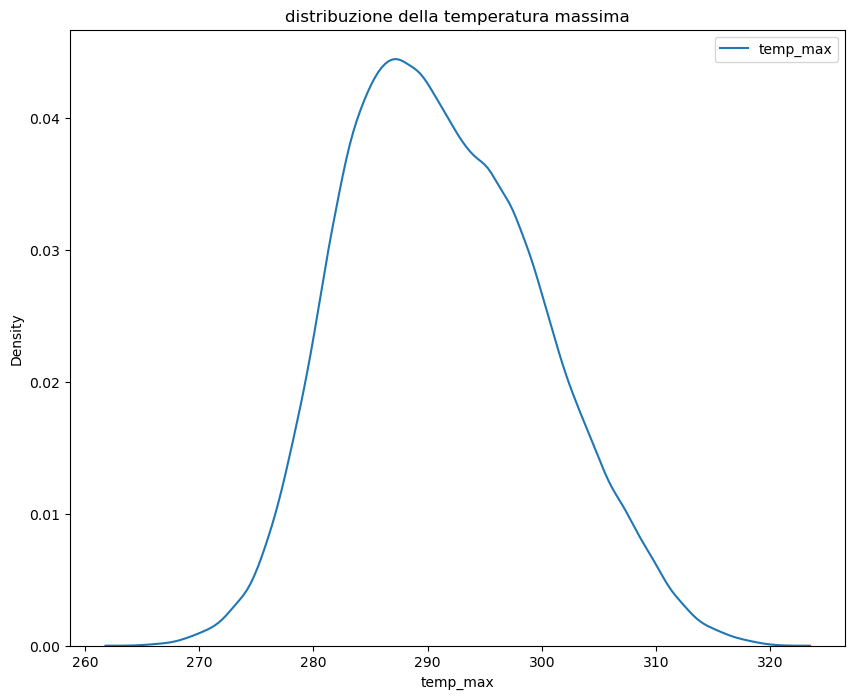

In [40]:
# potremmo vederlo graficamente se assomiglia ad una gaussiana
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della temperatura massima")

sns.kdeplot(df["temp_max"],ax=ax1, label ="temp_max")


plt.legend()

In [55]:
df['temp_max'].nlargest(n=7903).index

Int64Index([  4159, 140988,  18574,  31698,  51907, 102550, 104920, 113363,
            113639, 114977,
            ...
             14228,  14307,  14375,  14549,  14624,  14710,  14729,  14928,
             14974,  15124],
           dtype='int64', length=7903)

In [57]:
df_temp_max = df.loc[df['temp_max'].nlargest(n=7903).index]
df_temp_max

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
4159,2015-07-13 13:00:00+02:00,Seville,311.08,305.15,321.15,1018,31,1,240,0.0,0.0,0.0,0,800,clear,sky is clear,01d
140988,2015-07-13 12:00:00+02:00,Seville,310.12,303.15,321.15,1018,35,0,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
18574,2015-07-04 14:00:00+02:00,Seville,311.73,306.15,320.15,1018,19,1,140,0.0,0.0,0.0,0,800,clear,sky is clear,01d
31698,2016-07-24 13:00:00+02:00,Seville,311.64,306.15,320.15,1015,24,1,100,0.0,0.0,0.0,0,800,clear,sky is clear,01d
51907,2015-07-26 13:00:00+02:00,Seville,310.33,303.15,320.15,1015,26,1,0,0.0,0.0,0.0,0,800,clear,sky is clear,01d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,2018-08-04 18:00:00+02:00,Barcelona,306.15,306.15,306.15,1016,41,5,130,0.0,0.0,0.0,20,801,clouds,few clouds,02d
14729,2016-07-08 15:00:00+02:00,Madrid,305.06,304.15,306.15,1021,27,2,310,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14928,2017-07-01 19:00:00+02:00,Seville,305.76,305.15,306.15,1016,14,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14974,2018-07-10 14:00:00+02:00,Barcelona,304.15,302.15,306.15,1015,38,3,180,0.0,0.0,0.0,20,801,clouds,few clouds,02d


In [76]:
city = np.where(df_temp_max["city_name"] == "Seville")
len(city[0])

4614

visualizziamo perché é bello:

/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_2416/2469803926.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Seville','count':len(city[0])},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_2416/2469803926.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Madrid','count':1850},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_2416/2469803926.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_city = df_city.append({'city':'Bilbao','count':349},ignore_index=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_2416/2469803926.py:5: FutureWarning: The frame.append method

Text(0.5, 0.98, 'distribuzione delle città piú calde')

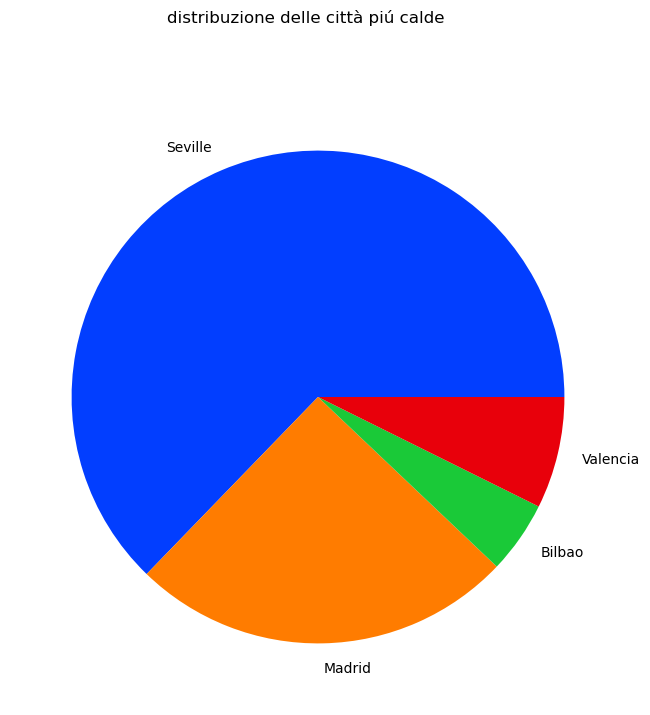

In [136]:
df_city = pd.DataFrame(columns=["city","count"])
df_city = df_city.append({'city':'Seville','count':len(city[0])},ignore_index=True)
df_city = df_city.append({'city':'Madrid','count':1850},ignore_index=True)
df_city = df_city.append({'city':'Bilbao','count':349},ignore_index=True)
df_city = df_city.append({'city':'Valencia','count':539},ignore_index=True)

fig,ax1= plt.subplots(ncols=1, figsize=(10, 8))

colors = sns.color_palette('bright')[0:4]
ax1.pie(df_city["count"],labels=df_city["city"],colors=colors)
fig.suptitle("distribuzione delle città piú calde")

In [87]:
seville = df_temp_max.loc[df_temp_max["city_name"] == "Seville"]
seville["weather_main"].describe()

count      4614
unique        3
top       clear
freq       3905
Name: weather_main, dtype: object

In [88]:
madrid = df_temp_max.loc[df_temp_max["city_name"] == "Madrid"]
madrid["weather_main"].describe()

count      1850
unique        3
top       clear
freq       1461
Name: weather_main, dtype: object

In [81]:
df_temp_max.loc[df_temp_max["city_name"] == "Barcelona"]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


In [89]:
bilbao = df_temp_max.loc[df_temp_max["city_name"] == "Bilbao"]
bilbao["weather_main"].describe()

count       349
unique        3
top       clear
freq        195
Name: weather_main, dtype: object

In [90]:
valencia = df_temp_max.loc[df_temp_max["city_name"] == "Valencia"]
valencia["weather_main"].describe()

count       539
unique        3
top       clear
freq        281
Name: weather_main, dtype: object

# 4.
## Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento (NOTA: il dataset riporta i valori in Kelvin)

In [112]:
df_snow = df.loc[(df["snow_3h"]  != 0)]
df_snow["temp"].describe()

count    216.000000
mean     276.118751
std        1.764093
min      272.399500
25%      274.806742
50%      276.356156
75%      276.941250
max      282.750000
Name: temp, dtype: float64

# 5.
## Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte

In [113]:
df_snow

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2600,2015-03-23 11:00:00+01:00,Bilbao,276.356000,276.356000,276.356000,1012,98,0,147,0.9,0.0,2.746,92,501,rain,moderate rain,10
2926,2015-01-20 04:00:00+01:00,Bilbao,275.203000,275.203000,275.203000,1012,97,1,198,0.3,0.0,0.200,88,500,rain,light rain,10
6250,2015-02-04 20:00:00+01:00,Bilbao,274.826656,274.826656,274.826656,1014,90,3,13,0.3,0.0,20.900,89,500,rain,light rain,10
10148,2015-02-08 16:00:00+01:00,Bilbao,277.219500,277.219500,277.219500,1031,82,2,21,0.3,0.0,0.200,78,500,rain,light rain,10
11016,2015-02-01 09:00:00+01:00,Bilbao,276.367344,276.367344,276.367344,1010,92,4,314,0.9,0.0,0.550,92,501,rain,moderate rain,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152628,2015-02-03 10:00:00+01:00,Bilbao,276.557500,276.557500,276.557500,1004,94,1,281,0.9,0.0,1.100,84,501,rain,moderate rain,10
153808,2015-02-02 03:00:00+01:00,Bilbao,276.382656,276.382656,276.382656,1012,96,1,250,0.3,0.0,0.050,84,500,rain,light rain,10
154633,2015-02-04 06:00:00+01:00,Bilbao,273.317000,273.317000,273.317000,1006,97,1,119,0.3,0.0,3.900,88,500,rain,light rain,10
157078,2015-01-22 10:00:00+01:00,Bilbao,277.648000,277.648000,277.648000,1013,96,2,343,3.0,0.0,2.700,92,502,rain,heavy intensity rain,10


In [114]:
snowing_dif = df_snow["temp_max"] - df_snow["temp_min"]
snowing_dif.describe()

count    216.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [115]:
hot_dif = df_temp_max["temp_max"] - df_temp_max["temp_min"]
hot_dif.describe()

count    7903.000000
mean        7.618640
std         6.453353
min         0.000000
25%         2.000000
50%         6.000000
75%        12.000000
max        33.330000
dtype: float64

# Parte 2: Trasformazione e Predizione